In [1]:
!pip install Sastrawi

In [2]:
# Standard library for data sciene
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library for text processing
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
# Library for NLP
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Library for basic machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator
# Library for deep learning
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
df = pd.read_csv("GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv")

In [4]:
df.head()

userName                                            content   
0                Yuga Edit                            akun gopay saya di blok  \
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion  
0      1  2022-01-21 10:52:12      4.9.3  
1      3  2021-11-30 15:40:38      4.9.3  
2      4  2021-11-29 22:58:12      4.9.3  
3      1  2022-09-03 15:21:17      4.9.3  
4      5  2022-01-15 10:05:27      4.9.3

In [5]:
print('Jumlah missing values disetiap kolom:\n', df.isnull().sum())

Jumlah missing values disetiap kolom:
 userName      0
content       2
score         0
at            0
appVersion    0
dtype: int64


In [6]:
df.dropna(inplace=True)

In [7]:
print("\nDataFrame setelah mengatasi missing values:")
print(df)


DataFrame setelah mengatasi missing values:
                       userName   
0                     Yuga Edit  \
1                      ff burik   
2       Anisa Suci Rahmayuliani   
3                  naoki yakuza   
4                 Trio Sugianto   
...                         ...   
224997                Sad Gamer   
224998             fadhil fadil   
224999               g sugiarto   
225000           J i H A D 'B E   
225001                Ria Heria   

                                                  content  score   
0                                 akun gopay saya di blok      1  \
1       Lambat sekali sekarang ini bosssku apk gojek g...      3   
2       Kenapa sih dari kemarin sy buka aplikasi gojek...      4   
3       Baru download gojek dan hape baru trus ditop u...      1   
4                                                  Mantap      5   
...                                                   ...    ...   
224997  Gofood Biaya lain2ya gak ngotak mending hujan2... 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225000 entries, 0 to 225001
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   userName    225000 non-null  object
 1   content     225000 non-null  object
 2   score       225000 non-null  int64 
 3   at          225000 non-null  object
 4   appVersion  225000 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.3+ MB


In [9]:
df.head()

userName                                            content   
0                Yuga Edit                            akun gopay saya di blok  \
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion  
0      1  2022-01-21 10:52:12      4.9.3  
1      3  2021-11-30 15:40:38      4.9.3  
2      4  2021-11-29 22:58:12      4.9.3  
3      1  2022-09-03 15:21:17      4.9.3  
4      5  2022-01-15 10:05:27      4.9.3

LABELING POSITIF NEGATIVE NETRAL

In [10]:
df.head()

userName                                            content   
0                Yuga Edit                            akun gopay saya di blok  \
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion  
0      1  2022-01-21 10:52:12      4.9.3  
1      3  2021-11-30 15:40:38      4.9.3  
2      4  2021-11-29 22:58:12      4.9.3  
3      1  2022-09-03 15:21:17      4.9.3  
4      5  2022-01-15 10:05:27      4.9.3

C:\Users\Nabilla Yesikal\AppData\Local\Temp\ipykernel_14532\2838436907.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


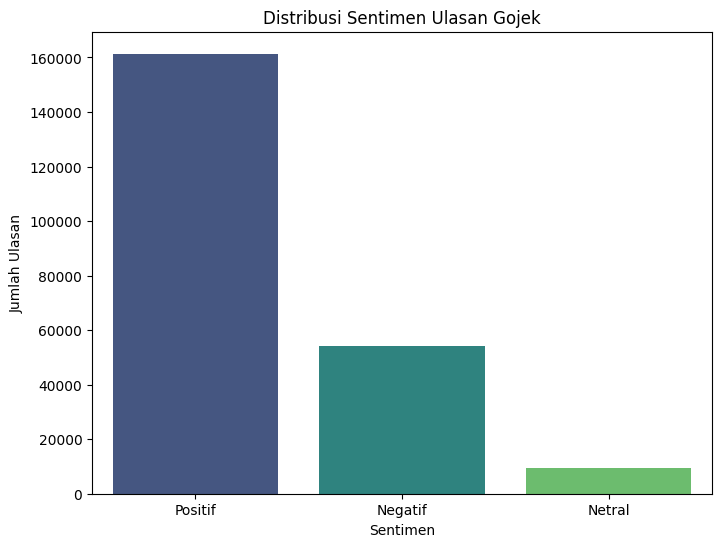

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset dengan kolom 'sentiment' yang telah ditambahkan
df = pd.read_csv('GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv')

# Fungsi untuk menetapkan label sentimen berdasarkan nilai score
def label_sentiment(score):
    if score in [1, 2]:
        return 'Negatif'
    elif score == 3:
        return 'Netral'
    elif score in [4, 5]:
        return 'Positif'

# Menambahkan kolom 'sentiment' berdasarkan kolom 'score'
df['sentiment'] = df['score'].apply(label_sentiment)

# Menghitung jumlah setiap sentimen
sentiment_counts = df['sentiment'].value_counts()

# Plot distribusi sentimen
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribusi Sentimen Ulasan Gojek')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

In [12]:
df.head()

userName                                            content   
0                Yuga Edit                            akun gopay saya di blok  \
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion sentiment  
0      1  2022-01-21 10:52:12      4.9.3   Negatif  
1      3  2021-11-30 15:40:38      4.9.3    Netral  
2      4  2021-11-29 22:58:12      4.9.3   Positif  
3      1  2022-09-03 15:21:17      4.9.3   Negatif  
4      5  2022-01-15 10:05:27      4.9.3   Positif

In [13]:
# Menyimpan dataframe ke file CSV baru
df.to_csv('GojekAppReview_with_Sentiment.csv', index=False)

TEXT PREPROCESSING

In [14]:
df = pd.read_csv("GojekAppReview_with_Sentiment.csv")

In [15]:
import nltk

In [16]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Nabilla
[nltk_data]    |     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Nabilla
[nltk_data]    |     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Nabilla
[nltk_data]    |     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Nabilla
[nltk_data]    |     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptr

True

In [17]:
df['content'] = df['content'].astype(str)

CASE FOLDING

In [18]:
# merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

df['casefolded_content'] = df['content'].apply(lambda x: x.casefold())

In [19]:
print(df[['content', 'casefolded_content']])

                                                  content   
0                                 akun gopay saya di blok  \
1       Lambat sekali sekarang ini bosssku apk gojek g...   
2       Kenapa sih dari kemarin sy buka aplikasi gojek...   
3       Baru download gojek dan hape baru trus ditop u...   
4                                                  Mantap   
...                                                   ...   
224997  Gofood Biaya lain2ya gak ngotak mending hujan2...   
224998                                            Yok lah   
224999                                           Sempurna   
225000  GOJEK LAMA LAMA GAK JELAS  LAGI PESEN MASA MAP...   
225001                                               Good   

                                       casefolded_content  
0                                 akun gopay saya di blok  
1       lambat sekali sekarang ini bosssku apk gojek g...  
2       kenapa sih dari kemarin sy buka aplikasi gojek...  
3       baru download gojek

In [20]:
df.head()

userName                                            content   
0                Yuga Edit                            akun gopay saya di blok  \
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion sentiment   
0      1  2022-01-21 10:52:12      4.9.3   Negatif  \
1      3  2021-11-30 15:40:38      4.9.3    Netral   
2      4  2021-11-29 22:58:12      4.9.3   Positif   
3      1  2022-09-03 15:21:17      4.9.3   Negatif   
4      5  2022-01-15 10:05:27      4.9.3   Positif   

                                  casefolded_content  
0                            akun gopay saya di blok  
1  lambat sekali sekarang ini bosssku apk gojek g...  
2  kenapa sih dari kemarin sy buka aplikasi gojek...  
3  baru download gojek dan hape baru trus ditop u...  
4                                             mantap

CLEANING TEXT

In [21]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
import requests

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# URLs for additional stopwords
rama_stopword = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt"
yutomo_stopword = "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt"
fpmipa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt"
sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
aliakbar_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt"
pebahasa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt"
elang_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"

# Combine stopwords from different sources
nltk_stopword = stopwords.words('indonesian')

# List of URLs to be fetched
path_stopwords = [rama_stopword, yutomo_stopword, fpmipa_stopword, sastrawi_stopword,
                  aliakbar_stopword, pebahasa_stopword, elang_stopword]

# Start with NLTK stopwords
stopwords_l = nltk_stopword

# Fetch stopwords from external URLs
for path in path_stopwords:
    response = requests.get(path)
    stopwords_l += response.text.split('\n')

# Convert stopwords to a set for efficiency
stop_words = set(stopwords_l)
print(f'Stopwords: {list(stop_words)[:5]}')

# Load the Gojek dataset
file_path = 'GojekAppReview_with_Sentiment.csv'
df = pd.read_csv(file_path)

# Fill NaN values with an empty string before applying any text processing
df['casefolded_content'] = df['content'].fillna('')

# Function to clean text by removing stopwords and URLs
def preprocess(text):
    if isinstance(text, str):  # Check if the input is a string
        # Remove URLs
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        text = url_pattern.sub(r'', text)

        # Remove hashtags, mentions, or any special symbols (optional)
        text = re.sub(r'#\w+|@\w+|[^a-zA-Z\s]', '', text)

        # Convert to lowercase
        text = text.lower()

        # Optionally remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text
    else:
        return ''  # Return an empty string if it's not a valid string

# Apply preprocessing to the 'content' column
df['cleaned_content'] = df['casefolded_content'].map(preprocess)

# Display the first few rows of the processed data
print(df[['casefolded_content', 'cleaned_content']].head())

[nltk_data] Downloading package stopwords to C:\Users\Nabilla
[nltk_data]     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Nabilla
[nltk_data]     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stopwords: ['penggunaan', 'diperbuatnya', 'terlalu', 'cukupkah', 'lebih']
                                  casefolded_content   
0                            akun gopay saya di blok  \
1  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3  Baru download gojek dan hape baru trus ditop u...   
4                                             Mantap   

                                     cleaned_content  
0                            akun gopay saya di blok  
1  lambat sekali sekarang ini bosssku apk gojek g...  
2  kenapa sih dari kemarin sy buka aplikasi gojek...  
3  baru download gojek dan hape baru trus ditop u...  
4                                             mantap  


In [22]:
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove emojis
    emoji_pattern = re.compile(
        '['
        '\U0001F600-\U0001F64F'  # emoticons
        '\U0001F300-\U0001F5FF'  # symbols & pictographs
        '\U0001F680-\U0001F6FF'  # transport & map symbols
        '\U0001F700-\U0001F77F'  # alchemical symbols
        '\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
        '\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
        '\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
        '\U0001FA00-\U0001FA6F'  # Chess Symbols
        '\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
        '\U00002702-\U000027B0'  # Dingbats
        '\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, " ")

    # remove extra whitespace
    text = ' '.join(text.split())

In [23]:
print(df.columns)

Index(['userName', 'content', 'score', 'at', 'appVersion', 'sentiment',
       'casefolded_content', 'cleaned_content'],
      dtype='object')


In [24]:
df.head()

userName                                            content   
0                Yuga Edit                            akun gopay saya di blok  \
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion sentiment   
0      1  2022-01-21 10:52:12      4.9.3   Negatif  \
1      3  2021-11-30 15:40:38      4.9.3    Netral   
2      4  2021-11-29 22:58:12      4.9.3   Positif   
3      1  2022-09-03 15:21:17      4.9.3   Negatif   
4      5  2022-01-15 10:05:27      4.9.3   Positif   

                                  casefolded_content   
0                            akun gopay saya di blok  \
1  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3  Baru download gojek dan hape baru trus ditop u...   
4                                             Mantap   

                                     cleaned_content  
0                            akun gopay saya di blok  
1  lambat sekali sekarang ini bosssku apk gojek g...  
2  kenapa sih dari kemarin sy buka aplikasi gojek...  
3  baru download gojek dan hape baru trus ditop u...  
4                                             mantap

NORMALISASI

In [25]:
import pandas as pd

# Load the slang list from the Excel file
slang_file_path = 'list_normalisasi.xlsx'

# Read the Excel file
slangs_df = pd.read_excel(slang_file_path)

# Print the first few rows to ensure it's loaded correctly
print(slangs_df.head())

# Assuming the slang list is in two columns, "Before" and "After"
# Create a dictionary of slang mappings
dict_slangs = dict(zip(slangs_df['Before'], slangs_df['After']))

# Display the dictionary to verify
print(dict_slangs)

    Before     After
0  bosssku     bosku
1      apk  aplikasi
2       gk     tidak
3       sy      saya
4     kalo     kalau
{'bosssku': 'bosku', 'apk': 'aplikasi', 'gk': 'tidak', 'sy': 'saya', 'kalo': 'kalau', 'trus': 'terus', 'gak': 'tidak', 'udah': 'sudah', 'kak': 'saudara', 'pin': 'PIN', 'ngga': 'tidak', 'susah': 'sulit', 'bgt': 'banget', 'dapet': 'dapat', 'gofood': 'go-food', 'ongkirnya': 'ongkir', 'pake': 'pakai', 'yah': 'ya', 'ok': 'oke', 'mending': 'lebih baik', 'coba': 'coba', 'blm': 'belum', 'bngt': 'banget', 'ny': 'ini', 'ko': 'kok', 'pke': 'pakai', 'jg': 'juga', 'gmn': 'gimana', 'makasih': 'terima kasih', 'tks': 'terima kasih', 'kmrn': 'kemarin', 'mnta': 'minta', 'bgs': 'bagus', 'gpp': 'gapapa', 'ntar': 'nanti', 'mntp': 'mantap', 'bh': 'bah'}


In [26]:
pip install textblob

In [27]:
import pandas as pd

# Path ke file Excel yang berisi daftar slang
slang_file_path = 'list_normalisasi.xlsx'

# Membaca file Excel ke dalam DataFrame
try:
    slangs_df = pd.read_excel(slang_file_path)
    print("File slang berhasil dibaca.")
except FileNotFoundError:
    print(f"File {slang_file_path} tidak ditemukan. Pastikan path-nya benar.")
    # Anda bisa menambahkan penanganan lebih lanjut di sini
except Exception as e:
    print(f"Terjadi error saat membaca file slang: {e}")
    # Anda bisa menambahkan penanganan lebih lanjut di sini

# Menampilkan beberapa baris pertama untuk verifikasi
print(slangs_df.head())

File slang berhasil dibaca.
    Before     After
0  bosssku     bosku
1      apk  aplikasi
2       gk     tidak
3       sy      saya
4     kalo     kalau


In [28]:
# Pastikan kolom 'Before' dan 'After' ada dalam DataFrame
if 'Before' not in slangs_df.columns or 'After' not in slangs_df.columns:
    raise ValueError("Kolom 'Before' atau 'After' tidak ditemukan dalam DataFrame slang.")

# Menghapus spasi ekstra dan mengonversi ke string
slangs_df['Before'] = slangs_df['Before'].astype(str).str.strip()
slangs_df['After'] = slangs_df['After'].astype(str).str.strip()

# Membuat dictionary dari DataFrame
dict_slangs = dict(zip(slangs_df['Before'], slangs_df['After']))

# Menampilkan beberapa entri untuk verifikasi
print("Contoh dictionary slang:")
for i, (k, v) in enumerate(dict_slangs.items()):
    if i >= 5:
        break
    print(f"'{k}' => '{v}'")

Contoh dictionary slang:
'bosssku' => 'bosku'
'apk' => 'aplikasi'
'gk' => 'tidak'
'sy' => 'saya'
'kalo' => 'kalau'


In [29]:
from textblob import TextBlob

# Pastikan dictionary slang sudah dibuat dengan benar
print("Contoh dict_slangs:", list(dict_slangs.items())[:5])

# Fungsi untuk menggantikan slang dengan bentuk standarnya
def replace_slangs(review):
    wordlist = TextBlob(review).words
    replaced_words = []
    for word in wordlist:
        # Ganti kata jika ada dalam dict_slangs, jika tidak gunakan kata asli
        replaced_word = dict_slangs.get(word, word)
        replaced_words.append(replaced_word)
    return ' '.join(replaced_words)

# Terapkan fungsi pada kolom 'cleaned_content'
df['normalization_content'] = df['cleaned_content'].apply(replace_slangs)

# Tampilkan hasilnya
print(df[['cleaned_content', 'normalization_content']].head())

Contoh dict_slangs: [('bosssku', 'bosku'), ('apk', 'aplikasi'), ('gk', 'tidak'), ('sy', 'saya'), ('kalo', 'kalau')]
                                     cleaned_content   
0                            akun gopay saya di blok  \
1  lambat sekali sekarang ini bosssku apk gojek g...   
2  kenapa sih dari kemarin sy buka aplikasi gojek...   
3  baru download gojek dan hape baru trus ditop u...   
4                                             mantap   

                               normalization_content  
0                            akun gopay saya di blok  
1  lambat sekali sekarang ini bosku aplikasi goje...  
2  kenapa sih dari kemarin saya buka aplikasi goj...  
3  baru download gojek dan hape baru terus ditop ...  
4                                             mantap  


In [30]:
from textblob import TextBlob
clean_text = []
for review in df['cleaned_content']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [31]:
clean_text

['akun gopay saya di blok',
 'lambat sekali sekarang ini bosku aplikasi gojek tidak kaya dulu',
 'kenapa sih dari kemarin saya buka aplikasi gojek malah keluar sendiri terus saya kasih bintang dulu kalau sudah normal saya kasih bintang',
 'baru download gojek dan hape baru terus ditop u gopay transaksi dialfamart transaksi bloked transaksilaporan di pusat bantuan tidak jelas yang ditanyakan apa jawaban lainlama lama gojek dikelola tokopedia sudah nyimpangapa gojek anak bangsa seperti dulu apa punya tokopedia',
 'mantap',
 'bagus',
 'coba dulu',
 'oke',
 'gimana ini saudara PIN saya salah terus padahal sudah di ubah masih salah',
 'biar aman kamu tidak bisa pakai gojek jadi saya uninstal biar aman',
 'kumpulan driver sampah',
 'makin lama gojek makin tidak jelas sulit banget dapat driver buat go-food ongkir juga mahal banget mohon diperbaiki',
 'oke mantap',
 'verry good',
 'aplikasi asuuu makin lama main gx jelas ais hrs aplikasi ini lgi lebih baik pakai aplikasi lain lebih akurat',
 '

In [32]:
df['normalization_content'] = clean_text

In [33]:
df.head()

userName                                            content   
0                Yuga Edit                            akun gopay saya di blok  \
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion sentiment   
0      1  2022-01-21 10:52:12      4.9.3   Negatif  \
1      3  2021-11-30 15:40:38      4.9.3    Netral   
2      4  2021-11-29 22:58:12      4.9.3   Positif   
3      1  2022-09-03 15:21:17      4.9.3   Negatif   
4      5  2022-01-15 10:05:27      4.9.3   Positif   

                                  casefolded_content   
0                            akun gopay saya di blok  \
1  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3  Baru download gojek dan hape baru trus ditop u...   
4                                             Mantap   

                                     cleaned_content   
0                            akun gopay saya di blok  \
1  lambat sekali sekarang ini bosssku apk gojek g...   
2  kenapa sih dari kemarin sy buka aplikasi gojek...   
3  baru download gojek dan hape baru trus ditop u...   
4                                             mantap   

                               normalization_content  
0                            akun gopay saya di blok  
1  lambat sekali sekarang ini bosku aplikasi goje...  
2  kenapa sih dari kemarin saya buka aplikasi goj...  
3  baru download gojek dan hape baru terus ditop ...  
4                                             mantap

In [34]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [35]:
df['final_text'] = df['normalization_content'].apply(lambda remove: remove_small_words(str(remove)))

In [36]:
df.head()

userName                                            content   
0                Yuga Edit                            akun gopay saya di blok  \
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion sentiment   
0      1  2022-01-21 10:52:12      4.9.3   Negatif  \
1      3  2021-11-30 15:40:38      4.9.3    Netral   
2      4  2021-11-29 22:58:12      4.9.3   Positif   
3      1  2022-09-03 15:21:17      4.9.3   Negatif   
4      5  2022-01-15 10:05:27      4.9.3   Positif   

                                  casefolded_content   
0                            akun gopay saya di blok  \
1  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3  Baru download gojek dan hape baru trus ditop u...   
4                                             Mantap   

                                     cleaned_content   
0                            akun gopay saya di blok  \
1  lambat sekali sekarang ini bosssku apk gojek g...   
2  kenapa sih dari kemarin sy buka aplikasi gojek...   
3  baru download gojek dan hape baru trus ditop u...   
4                                             mantap   

                               normalization_content   
0                            akun gopay saya di blok  \
1  lambat sekali sekarang ini bosku aplikasi goje...   
2  kenapa sih dari kemarin saya buka aplikasi goj...   
3  baru download gojek dan hape baru terus ditop ...   
4                                             mantap   

                                          final_text  
0                              akun gopay saya  blok  
1  lambat sekali sekarang  bosku aplikasi gojek t...  
2  kenapa  dari kemarin saya buka aplikasi gojek ...  
3  baru download gojek  hape baru terus ditop  go...  
4                                             mantap

TOKENISASI

In [37]:
def word_token(review_text):
  return word_tokenize(review_text)

In [ ]:
df['tokenize_content'] = df['final_text'].apply(lambda tokenize:word_token(str(tokenize)))

In [ ]:
df.head()

userName                                            content   
0                Yuga Edit                            akun gopay saya di blok  \
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion sentiment   
0      1  2022-01-21 10:52:12      4.9.3   Negatif  \
1      3  2021-11-30 15:40:38      4.9.3    Netral   
2      4  2021-11-29 22:58:12      4.9.3   Positif   
3      1  2022-09-03 15:21:17      4.9.3   Negatif   
4      5  2022-01-15 10:05:27      4.9.3   Positif   

                                  casefolded_content   
0                            akun gopay saya di blok  \
1  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3  Baru download gojek dan hape baru trus ditop u...   
4                                             Mantap   

                                     cleaned_content   
0                            akun gopay saya di blok  \
1  lambat sekali sekarang ini bosssku apk gojek g...   
2  kenapa sih dari kemarin sy buka aplikasi gojek...   
3  baru download gojek dan hape baru trus ditop u...   
4                                             mantap   

                               normalization_content   
0                            akun gopay saya di blok  \
1  lambat sekali sekarang ini bosku aplikasi goje...   
2  kenapa sih dari kemarin saya buka aplikasi goj...   
3  baru download gojek dan hape baru terus ditop ...   
4                                             mantap   

                                          final_text   
0                              akun gopay saya  blok  \
1  lambat sekali sekarang  bosku aplikasi gojek t...   
2  kenapa  dari kemarin saya buka aplikasi gojek ...   
3  baru download gojek  hape baru terus ditop  go...   
4                                             mantap   

                                    tokenize_content  
0                          [akun, gopay, saya, blok]  
1  [lambat, sekali, sekarang, bosku, aplikasi, go...  
2  [kenapa, dari, kemarin, saya, buka, aplikasi, ...  
3  [baru, download, gojek, hape, baru, terus, dit...  
4                                           [mantap]

In [ ]:
review_all = []

for review in df['final_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

akun
gopay
saya
blok
lambat
sekali
sekarang
bosku
aplikasi
gojek
tidak
kaya
dulu
kenapa
dari
kemarin
saya
buka
aplikasi
gojek
malah
keluar
sendiri
terus
saya
kasih
bintang
dulu
kalau
sudah
normal
saya
kasih
bintang
baru
download
gojek
hape
baru
terus
ditop
gopay
transaksi
dialfamart
transaksi
bloked
transaksilaporan
pusat
bantuan
tidak
jelas
yang
ditanyakan
jawaban
lainlama
lama
gojek
dikelola
tokopedia
sudah
nyimpangapa
gojek
anak
bangsa
seperti
dulu
punya
tokopedia
mantap
bagus
coba
dulu
gimana
saudara
saya
salah
terus
padahal
sudah
ubah
masih
salah
biar
aman
kamu
tidak
bisa
pakai
gojek
jadi
saya
uninstal
biar
aman
kumpulan
driver
sampah
makin
lama
gojek
makin
tidak
jelas
sulit
banget
dapat
driver
buat
-food
ongkir
juga
mahal
banget
mohon
diperbaiki
mantap
verry
good
aplikasi
asuuu
makin
lama
main
jelas
aplikasi
lebih
baik
pakai
aplikasi
lain
lebih
akurat
misi
dari
gojek
jago
tidak
jelas
syarat
penyelesaiannya
padahal
sudah
jelas
selesaikan
misi
dengan
membeli
voucher
tapi
masih
tida

In [ ]:
from nltk.probability import FreqDist

In [ ]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire gojek review")
freq_dist

how many frequency distribution samples from an entire gojek review


FreqDist({'saya': 36393, 'tidak': 34533, 'gojek': 32382, 'aplikasi': 26133, 'sangat': 26113, 'bisa': 23629, 'membantu': 18829, 'driver': 18746, 'bagus': 17780, 'sudah': 16513, ...})

In [ ]:
# menampilkan 500 kata yang paling sering muncul

common_review = freq_dist.most_common(225044)
print(common_review)

[('saya', 36393), ('tidak', 34533), ('gojek', 32382), ('aplikasi', 26133), ('sangat', 26113), ('bisa', 23629), ('membantu', 18829), ('driver', 18746), ('bagus', 17780), ('sudah', 16513), ('mantap', 15346), ('banget', 13017), ('pakai', 12669), ('gopay', 12088), ('yang', 11014), ('good', 10758), ('lagi', 10619), ('baik', 9262), ('tapi', 8830), ('untuk', 8448), ('padahal', 8366), ('lebih', 8040), ('promo', 7984), ('kalau', 7830), ('banyak', 7761), ('lama', 7689), ('tolong', 7417), ('terus', 7394), ('kasih', 7328), ('makin', 7095), ('juga', 7072), ('kenapa', 6980), ('buat', 6885), ('jadi', 6882), ('sama', 6566), ('sekali', 6495), ('malah', 6465), ('selalu', 6450), ('dapat', 6364), ('-food', 6309), ('sekarang', 5886), ('dari', 5808), ('dengan', 5530), ('sulit', 5413), ('cepat', 5321), ('akun', 5319), ('sering', 5128), ('mahal', 5081), ('masuk', 4892), ('saldo', 4547), ('voucher', 4337), ('update', 4276), ('biaya', 4210), ('mudah', 4088), ('pesan', 4063), ('drivernya', 4042), ('bayar', 3860)

In [ ]:
from wordcloud import WordCloud

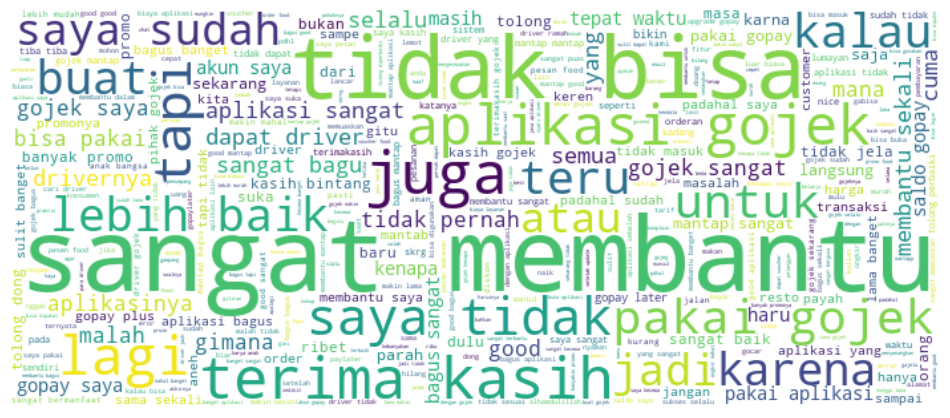

In [ ]:
# membuat visualisasi WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

STOPWORDS

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to C:\Users\Nabilla
[nltk_data]     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\Nabilla
[nltk_data]    |     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\Nabilla
[nltk_data]    |     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\Nabilla
[nltk_data]    |     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\Nabilla
[nltk_data]    |     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading pack

True

In [ ]:
# menampilkan kata stopwords bahasa indonesia
indonesian_stop = stopwords.words('indonesian')

# menghitung jumlah kata stopwords bahasa indonesia
print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [ ]:
# memasukkan stopwords bahasa indonesia ke dalam dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [ ]:
# menyimpan stopwords bahasa indonesia ke dalam format xlsx
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

In [ ]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)

  return tokenize

df['stopwords_content'] = df['tokenize_content'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

KeyboardInterrupt: 

In [ ]:
df.head()

userName                                            content   
0                Yuga Edit                            akun gopay saya di blok  \
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion   
0      1  2022-01-21 10:52:12      4.9.3  \
1      3  2021-11-30 15:40:38      4.9.3   
2      4  2021-11-29 22:58:12      4.9.3   
3      1  2022-09-03 15:21:17      4.9.3   
4      5  2022-01-15 10:05:27      4.9.3   

                                  casefolded_content   
0                            akun gopay saya di blok  \
1  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3  Baru download gojek dan hape baru trus ditop u...   
4                                             Mantap   

                                     cleaned_content   
0                            akun gopay saya di blok  \
1  lambat sekali sekarang ini bosssku apk gojek g...   
2  kenapa sih dari kemarin sy buka aplikasi gojek...   
3  baru download gojek dan hape baru trus ditop u...   
4                                             mantap   

                               normalization_content   
0                            akun gopay saya di blok  \
1  lambat sekali sekarang ini bosku aplikasi goje...   
2  kenapa sih dari kemarin saya buka aplikasi goj...   
3  baru download gojek dan hape baru terus ditop ...   
4                                             mantap   

                                          final_text   
0                              akun gopay saya  blok  \
1  lambat sekali sekarang  bosku aplikasi gojek t...   
2  kenapa  dari kemarin saya buka aplikasi gojek ...   
3  baru download gojek  hape baru terus ditop  go...   
4                                             mantap   

                                    tokenize_content   
0                          [akun, gopay, saya, blok]  \
1  [lambat, sekali, sekarang, bosku, aplikasi, go...   
2  [kenapa, dari, kemarin, saya, buka, aplikasi, ...   
3  [baru, download, gojek, hape, baru, terus, dit...   
4                                           [mantap]   

                                   stopwords_content  
0                                [akun, gopay, blok]  
1             [lambat, bosku, aplikasi, gojek, kaya]  
2  [kemarin, buka, aplikasi, gojek, kasih, bintan...  
3  [download, gojek, hape, ditop, gopay, transaks...  
4                                           [mantap]

STEMMING

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# stemming and lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [ ]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer

# Download necessary data (if not already done)
nltk.download('punkt')

# Initialize PorterStemmer
stemmer = PorterStemmer()

# Define the stemming function
def stemming(text):
    words = nltk.word_tokenize(text)  # Tokenize sentence into words
    stemmed_words = [stemmer.stem(word) for word in words]  # Perform stemming
    return ' '.join(stemmed_words)  # Join words back into a sentence

# Apply stemming function to 'stopwords_content' column
df['stem_content'] = df['stopwords_content'].apply(lambda text: stemming(text) if isinstance(text, str) else text)

[nltk_data] Downloading package punkt to C:\Users\Nabilla
[nltk_data]     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.head()

userName                                            content   
0                Yuga Edit                            akun gopay saya di blok  \
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion   
0      1  2022-01-21 10:52:12      4.9.3  \
1      3  2021-11-30 15:40:38      4.9.3   
2      4  2021-11-29 22:58:12      4.9.3   
3      1  2022-09-03 15:21:17      4.9.3   
4      5  2022-01-15 10:05:27      4.9.3   

                                  casefolded_content   
0                            akun gopay saya di blok  \
1  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3  Baru download gojek dan hape baru trus ditop u...   
4                                             Mantap   

                                     cleaned_content   
0                            akun gopay saya di blok  \
1  lambat sekali sekarang ini bosssku apk gojek g...   
2  kenapa sih dari kemarin sy buka aplikasi gojek...   
3  baru download gojek dan hape baru trus ditop u...   
4                                             mantap   

                               normalization_content   
0                            akun gopay saya di blok  \
1  lambat sekali sekarang ini bosku aplikasi goje...   
2  kenapa sih dari kemarin saya buka aplikasi goj...   
3  baru download gojek dan hape baru terus ditop ...   
4                                             mantap   

                                          final_text   
0                              akun gopay saya  blok  \
1  lambat sekali sekarang  bosku aplikasi gojek t...   
2  kenapa  dari kemarin saya buka aplikasi gojek ...   
3  baru download gojek  hape baru terus ditop  go...   
4                                             mantap   

                                    tokenize_content   
0                          [akun, gopay, saya, blok]  \
1  [lambat, sekali, sekarang, bosku, aplikasi, go...   
2  [kenapa, dari, kemarin, saya, buka, aplikasi, ...   
3  [baru, download, gojek, hape, baru, terus, dit...   
4                                           [mantap]   

                                   stopwords_content   
0                                [akun, gopay, blok]  \
1             [lambat, bosku, aplikasi, gojek, kaya]   
2  [kemarin, buka, aplikasi, gojek, kasih, bintan...   
3  [download, gojek, hape, ditop, gopay, transaks...   
4                                           [mantap]   

                                        stem_content  
0                                [akun, gopay, blok]  
1             [lambat, bosku, aplikasi, gojek, kaya]  
2  [kemarin, buka, aplikasi, gojek, kasih, bintan...  
3  [download, gojek, hape, ditop, gopay, transaks...  
4                                           [mantap]

In [ ]:
# Assuming all the preprocessing steps are applied, 
# the final output after all preprocessing is stored in 'stem_content' or a similar column.

# Create the final label by concatenating the processed text column
df['finalpreprocess'] = df['stem_content']

# Display the DataFrame to verify the new label is added correctly
print(df[['content', 'finalpreprocess']].head())

# You can now use 'final_label' for any further analysis or modeling

                                             content   
0                            akun gopay saya di blok  \
1  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3  Baru download gojek dan hape baru trus ditop u...   
4                                             Mantap   

                                     finalpreprocess  
0                                [akun, gopay, blok]  
1             [lambat, bosku, aplikasi, gojek, kaya]  
2  [kemarin, buka, aplikasi, gojek, kasih, bintan...  
3  [download, gojek, hape, ditop, gopay, transaks...  
4                                           [mantap]  


In [ ]:
# Ensure preprocessed_df is assigned
preprocessed_df = df  # or replace 'df' with the actual DataFrame variable you want to save

# Save into a CSV file
csv_file_path = 'preprocessed_gojek.csv'
preprocessed_df.to_csv(csv_file_path, sep=',', index=False, header=True)

print(f'Data has been saved to {csv_file_path}')

Data has been saved to preprocessed_gojek.csv
